In [1]:
import pandas as pd
import keras 
from PIL import Image

import numpy as np
from keras.applications import MobileNet
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, load_model
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD, Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from keras import optimizers, losses, activations, models
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, \
    GlobalMaxPool2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, Lambda, Conv2D
from tqdm import tqdm
import cv2
from cv2 import cvtColor

Using TensorFlow backend.


In [2]:
def read_and_resize(filepath, input_shape=(224, 224)):
    #try:
    im = cv2.imread(filepath)
    reshape_size = input_shape
    im = cv2.resize(im,reshape_size)
    #im = im/(max(im) + 0.001)
        #print(file_path)
    return np.array(im)
    #except :
       # print(filepath)
        #print("The program exited because the about file does not exist")
        
#     return np.array(im_array, dtype="float32")
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    #brightness_range=[0.2,1.5],
    zoom_range=0.2)
def augment(im_array):
    im_array = datagen.random_transform(im_array)
    return im_array

In [3]:
#image = read_and_resize()

In [4]:
def gen(df, batch_size=1, aug=False):
    df = df.sample(frac=1)

    while True:
        for i, batch in enumerate([df[i:i+batch_size] for i in range(0,df.shape[0],batch_size)]):
            if aug:
                images = np.array([augment(read_and_resize(file_path)) for file_path in batch.path.values])
            else:
                images = np.array([read_and_resize(file_path) for file_path in batch.path.values])


            #labels = np.array([dict_age[g] for g in batch.out_ages.values])
            labels = np.array(batch.out_ages.values)

            labels = labels[..., np.newaxis]

            yield images, labels

In [11]:
def get_model(optimizer,n_classes=1):

    base_model = MobileNet(weights="./mobilenet_1_0_224_tf_no_top.h5", include_top=False)

    #for layer in base_model.layers:
    #    layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.2)(x)
    #x = Flatten()
    #x = Dense(1000, activation="relu")(x)
    #x = Dropout(0.2)(x)
#     x = Dense(750,activation="relu")(x)
#     x = Dense(350,activation="relu")(x)
    #x = Dense(100,activation="relu")(x)
    #x = Dropout(0.2)(x)
    x = Dense(n_classes, activation="softmax", name="output_layer_1")(x)


    base_model = Model(base_model.input, x, name="base_model")
    base_model.compile(loss="categorical_crossentropy", metrics=['acc'], optimizer=optimizer)

    return base_model

In [12]:
if __name__ == "__main__":
    base_path = "./Dataset-copy/"


    accuracies = []
    print("Reading train and test CSV files ")
    train_df = pd.read_csv("expanded_data_shuffled.csv")
    tr_tr, tr_val = train_test_split(train_df, test_size=0.2,random_state = 100)
    tr_val, tr_test = train_test_split(tr_val, test_size=0.1,random_state = 100)
    tr_test.to_csv("fingerprint_test_dataset.csv", index=False)
    
    #tr_val['out_ages'].groupby
    print("Reading Done.")
    
    
    file_path = "fingerprint_data_train.h5"
    
    print("Generating callback_list")
    

    checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

    early = EarlyStopping(monitor="val_acc", mode="max", patience=50)

    reduce_on_plateau = ReduceLROnPlateau(monitor="val_acc",
                                          mode="max", 
                                          factor=0.1,
                                          #cooldown=0,
                                          patience=10,
                                          verbose=1,
                                          min_lr=0.00001)
    callbacks_list = [checkpoint,
                      reduce_on_plateau,
                      #tensorboard_callback
                      early
                     ]  # early
    
    print("Done Generating callbacklist.")
    print("generating Model")
    optimizer = Adam(lr=0.001)
    model = get_model( optimizer,n_classes=99)
    print("Done generating model")
    print("Running Fit_generator")
    model.fit_generator(gen(tr_tr,batch_size=8, aug=True), 
                        validation_data=gen(tr_val), 
                        epochs=200, 
                        verbose=1, 
                        #workers=4,
                        callbacks=callbacks_list,
                        steps_per_epoch=int(12159.75),#int(10740.75), 
                        validation_steps=50
                        #validation_data=((test_images), test_labels)
                        #use_multiprocessing=True
                       )
    #model.save(file_path)
    print("Trained Model saved to disk")

Reading train and test CSV files 
Reading Done.
Generating callback_list
Done Generating callbacklist.
generating Model
Done generating model
Running Fit_generator
Epoch 1/200


ValueError: Error when checking target: expected output_layer_1 to have shape (99,) but got array with shape (1,)

In [ ]:
df = pd.read_csv("fingerprint_dataset_data.csv")
file_path = df['Paths'][0]
def read_and_resize(filepath, input_shape=(224, 224)):
    
    im = cv2.imread(file_path)
    b,g,r = cv2.split(im)
    im = cv2.merge((b,g,r))
    #im = cvtColor(im, cv2.CV_GRAY2BGR)

In [ ]:
filepath = "./fingerprint_dataset/SOCOFing/Real/100__M_Right_middle_finger.BMP"
im = cv2.imread(filepath)
im = np.array(im)
print(im.shape)
b,g,r = cv2.split(im)
im = cv2.merge(b,g,r)

In [ ]:
import matplotlib.pyplot as plt

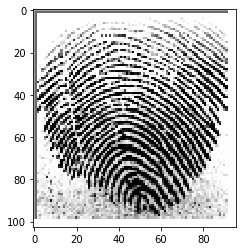

In [20]:
plt.imshow(im, cmap="gray")

In [25]:
im = cv2.imread(filepath)

In [ ]:
im_frame = cv2